# What is MNIST Dataset?
## The MINST dataset stands for “Modified National Institute of Standards and Technology“. The dataset contains a large collection of handwritten digits that is commonly used for training various image processing systems. The dataset was created by re-mixing samples from NIST’s original datasets, which were taken from American Census Bureau employees and high school students. It is designed to help scientists develop and test machine learning algorithms in pattern recognition and machine learning. It contains 60,000 training images and 10,000 testing images, each of which is a grayscale image of size 28×28 pixels.

# Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))  # Reshape to (60000, 784)
test_images = test_images.reshape((10000, 28 * 28))

# Normalize pixel values to be between 0 and 1

In [ ]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical one-hot encoding

In [ ]:
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Build the model with an explicit Input layer

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(28 * 28,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8322 - loss: 0.6101 - val_accuracy: 0.9476 - val_loss: 0.1848
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9522 - loss: 0.1732 - val_accuracy: 0.9627 - val_loss: 0.1371
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9642 - loss: 0.1231 - val_accuracy: 0.9691 - val_loss: 0.1069
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0895 - val_accuracy: 0.9699 - val_loss: 0.0989
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0739 - val_accuracy: 0.9737 - val_loss: 0.0870
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9827 - loss: 0.0605 - val_accuracy: 0.9751 - val_loss: 0.0804
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9873 - loss: 0.0468 - val_accuracy: 0.9767 - val_loss: 0.0758
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9881 - loss: 0.0418 - val_accuracy: 0.

the model performs optimally, reaching near-perfect accuracy while maintaining a balanced validation performance, making it suitable for practical use.

# Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0809
Test accuracy: 0.9779999852180481


the model is highly reliable for digit classification tasks, effectively distinguishing handwritten digits with minimal errors.

# Optionally: Plot training and validation loss

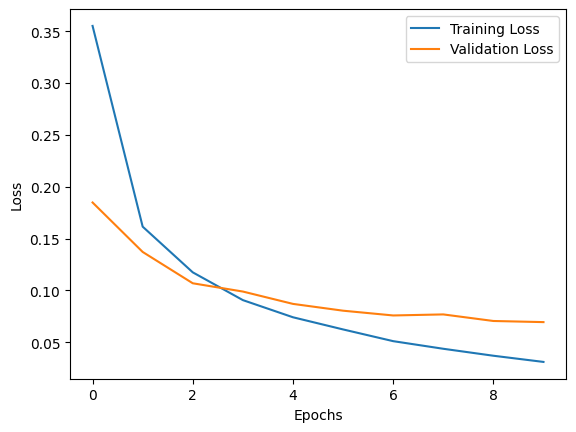

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The graph shows both training and validation loss steadily decreasing over 10 epochs, with the losses stabilizing by the end. The close alignment between the two curves indicates good generalization, meaning the model is learning effectively without overfitting. Overall, the model is well-optimized and performs efficiently.